## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import folium
import json

In [2]:
%matplotlib inline

In [3]:
path=r'/Users/keerthiputti/Desktop/Achievment 6/Airbnb Amsterdam/02 Data'

## Calendar data

In [4]:
df_cal=pd.read_csv(os.path.join(path,'Original Data','calendar.csv'),parse_dates=['date'],index_col=False)

In [5]:
df_cal

,listing_id,date,available,price
0,2818,2019-12-05,f,NaN
1,73208,2019-08-30,f,NaN
2,73208,2019-08-29,f,NaN
3,73208,2019-08-28,f,NaN
4,73208,2019-08-27,f,NaN
...,...,...,...,...
7310945,29979667,2018-12-11,t,$139.00
7310946,29979667,2018-12-10,t,$139.00
7310947,29979667,2018-12-09,t,$139.00
7310948,29979667,2018-12-08,t,$139.00


In [6]:
df_cal.describe()

,listing_id
count,7.310950e+06
mean,1.541725e+07
std,8.569190e+06
min,2.818000e+03
25%,8.187901e+06
50%,1.563049e+07
75%,2.202612e+07
max,3.058041e+07


In [7]:
df_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7310950 entries, 0 to 7310949
Data columns (total 4 columns):
 #   Column      Dtype         
---  ------      -----         
 0   listing_id  int64         
 1   date        datetime64[ns]
 2   available   object        
 3   price       object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 223.1+ MB


## Renaming columns

In [8]:
#renaming
df_cal.rename(columns={'listing_id':'Listing_id','date':'Date','available':'Availability','price':'Price_cal'},inplace=True)

In [9]:
#changing Listing_id column to string as ita representing ID and not interger
df_cal['Listing_id']=df_cal['Listing_id'].astype('str')

In [10]:
#replacing $ with empty space 
df_cal['Price_cal'] = df_cal['Price_cal'].str.replace('$', '')
df_cal['Price_cal'] = df_cal['Price_cal'].str.replace(',', '')

/var/folders/2f/9v7c1_v50z5919rws2_ds4rm0000gn/T/ipykernel_6774/1768204412.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_cal['Price_cal'] = df_cal['Price_cal'].str.replace('$', '')


In [11]:
#Changing datatype

df_cal['Price_cal']=df_cal['Price_cal'].astype('float64')

In [12]:
df_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7310950 entries, 0 to 7310949
Data columns (total 4 columns):
 #   Column        Dtype         
---  ------        -----         
 0   Listing_id    object        
 1   Date          datetime64[ns]
 2   Availability  object        
 3   Price_cal     float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 223.1+ MB


## Missing value check

In [13]:
df_cal.isnull().sum()

Listing_id            0
Date                  0
Availability          0
Price_cal       6110879
dtype: int64

As we will be looking into listing data as well, we might find price for the listing there and hence wont be filling NULLS as of now.

## Mixed data check

In [14]:
#mixed data columns
for col in df_cal.columns.tolist():
  weird = (df_cal[[col]].applymap(type) != df_cal[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_cal[weird]) > 0:
    print (col)

We will look into the Price_cal later

## Duplcates check

In [15]:
#checking duplicates

df_cal_dups = df_cal[df_cal.duplicated()]

In [16]:
df_cal_dups

,Listing_id,Date,Availability,Price_cal


No Duplicates

## Listing data

In [17]:
#Importing llisting data
df_list=pd.read_csv(os.path.join(path,'Original Data','listings.csv'),parse_dates=['last_review'],index_col=False)

In [18]:
df_list.shape

(20030, 16)

In [19]:
df_list.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,NaN,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,59,3,248,2018-11-28,2.10,1,44
1,3209,"Quiet apt near center, great view",3806,Maartje,NaN,Westerpark,52.390225,4.873924,Entire home/apt,160,4,42,2018-08-29,1.03,1,47
2,20168,100%Centre-Studio 1 Private Floor/Bathroom,59484,Alex,NaN,Centrum-Oost,52.365087,4.893541,Entire home/apt,80,1,233,2018-11-30,2.18,2,198
3,25428,Lovely apt in City Centre (Jordaan),56142,Joan,NaN,Centrum-West,52.373114,4.883668,Entire home/apt,125,14,1,2018-01-21,0.09,2,141
4,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,NaN,Centrum-West,52.386727,4.892078,Private room,150,2,171,2018-11-25,2.03,1,199


In [20]:
df_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20030 entries, 0 to 20029
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              20030 non-null  int64         
 1   name                            19992 non-null  object        
 2   host_id                         20030 non-null  int64         
 3   host_name                       20026 non-null  object        
 4   neighbourhood_group             0 non-null      float64       
 5   neighbourhood                   20030 non-null  object        
 6   latitude                        20030 non-null  float64       
 7   longitude                       20030 non-null  float64       
 8   room_type                       20030 non-null  object        
 9   price                           20030 non-null  int64         
 10  minimum_nights                  20030 non-null  int64         
 11  nu

## Dropping and Renaming columns

In [21]:
# dropping Hostname column
df_list.drop(columns=['host_name'],inplace=True)

In [22]:
#dropping neighbourhood group as there i no data in it
df_list.drop(columns=['neighbourhood_group'],inplace=True)

In [23]:
#not required field
df_list.drop(columns=['reviews_per_month'],inplace=True)

In [24]:
#not required field
df_list.drop(columns=['last_review'],inplace=True)

In [25]:
#changing Listing_id column to string as ita representing ID and not interger
df_list['id']=df_list['id'].astype('str')

In [26]:
#changing Listing_id column to string as ita representing ID and not interger
df_list['host_id']=df_list['host_id'].astype('str')

In [27]:
df_list.shape

(20030, 12)

In [28]:
 #renaming
    
df_list.rename(columns={'id':'Listing_id','name':'Place_name','host_id':'Host_id','neighbourhood':'Neighbourhood','room_type':'Room_type','price':'Price_list','minimum_nights':'Min_nights','number_of_reviews':'N_reviews','calculated_host_listings_count':'Host_list_count','availability_365':'Availability_365'},inplace=True)

In [29]:
df_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20030 entries, 0 to 20029
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Listing_id        20030 non-null  object 
 1   Place_name        19992 non-null  object 
 2   Host_id           20030 non-null  object 
 3   Neighbourhood     20030 non-null  object 
 4   latitude          20030 non-null  float64
 5   longitude         20030 non-null  float64
 6   Room_type         20030 non-null  object 
 7   Price_list        20030 non-null  int64  
 8   Min_nights        20030 non-null  int64  
 9   N_reviews         20030 non-null  int64  
 10  Host_list_count   20030 non-null  int64  
 11  Availability_365  20030 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 1.8+ MB


## Missing value check

In [30]:
df_list.isnull().sum()

Listing_id           0
Place_name          38
Host_id              0
Neighbourhood        0
latitude             0
longitude            0
Room_type            0
Price_list           0
Min_nights           0
N_reviews            0
Host_list_count      0
Availability_365     0
dtype: int64

In [31]:
#removing NULL ones with no name

df_list = df_list[df_list['Place_name'].isnull() == False]

In [32]:
df_list.shape

(19992, 12)

## Mixed datatype

In [33]:
#mixed data columns
for col in df_list.columns.tolist():
  weird = (df_list[[col]].applymap(type) != df_list[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_list[weird]) > 0:
    print (col)

No Mixed data type columns!good!

## Duplicates check

In [34]:
df_list_dups = df_list[df_list.duplicated()]

In [35]:
df_list_dups

,Listing_id,Place_name,Host_id,Neighbourhood,latitude,longitude,Room_type,Price_list,Min_nights,N_reviews,Host_list_count,Availability_365


No Duplcates! great!

Now We have all the data required and cleaned. Lets go over the data once again and then merge them using Listing_id

In [36]:
df_cal.head()

,Listing_id,Date,Availability,Price_cal
0,2818,2019-12-05,f,NaN
1,73208,2019-08-30,f,NaN
2,73208,2019-08-29,f,NaN
3,73208,2019-08-28,f,NaN
4,73208,2019-08-27,f,NaN


In [37]:
df_list.head()

,Listing_id,Place_name,Host_id,Neighbourhood,latitude,longitude,Room_type,Price_list,Min_nights,N_reviews,Host_list_count,Availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,59,3,248,1,44
1,3209,"Quiet apt near center, great view",3806,Westerpark,52.390225,4.873924,Entire home/apt,160,4,42,1,47
2,20168,100%Centre-Studio 1 Private Floor/Bathroom,59484,Centrum-Oost,52.365087,4.893541,Entire home/apt,80,1,233,2,198
3,25428,Lovely apt in City Centre (Jordaan),56142,Centrum-West,52.373114,4.883668,Entire home/apt,125,14,1,2,141
4,27886,"Romantic, stylish B&B houseboat in canal district",97647,Centrum-West,52.386727,4.892078,Private room,150,2,171,1,199


## Importing listing details data to add few more data points

In [38]:
df_list_dtl=pd.read_csv(os.path.join(path,'Original Data','listings_details.csv'),index_col=False)

/var/folders/2f/9v7c1_v50z5919rws2_ds4rm0000gn/T/ipykernel_6774/1681033696.py:1: DtypeWarning: Columns (87) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list_dtl=pd.read_csv(os.path.join(path,'Original Data','listings_details.csv'),index_col=False)


In [39]:
df_list_dtl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20030 entries, 0 to 20029
Data columns (total 96 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                20030 non-null  int64  
 1   listing_url                       20030 non-null  object 
 2   scrape_id                         20030 non-null  int64  
 3   last_scraped                      20030 non-null  object 
 4   name                              19992 non-null  object 
 5   summary                           19510 non-null  object 
 6   space                             14579 non-null  object 
 7   description                       19906 non-null  object 
 8   experiences_offered               20030 non-null  object 
 9   neighborhood_overview             13257 non-null  object 
 10  notes                             9031 non-null   object 
 11  transit                           13635 non-null  object 
 12  acce

## We would need only couple of columns from this data set.
1. Listing_id(id)
2. Host_id
3. accommodates
4. bathrooms
5. bedrooms
6. review_scores_rating

In [40]:
df_list_dtl=df_list_dtl[['id','host_id','accommodates','bathrooms','bedrooms','review_scores_rating']]

In [41]:
df_list_dtl.shape

(20030, 6)

## Renaming columns and changing data. types

In [42]:
#renaming
df_list_dtl.rename(columns={'id':'Listing_id','host_id':'Host_id','accommodates':'N.People','bathrooms':'Bathrooms','bedrooms':'Bedrooms','review_scores_rating':'Rating_100'},inplace=True)


In [43]:
df_list_dtl.head()

,Listing_id,Host_id,N.People,Bathrooms,Bedrooms,Rating_100
0,2818,3159,2,1.5,1.0,97.0
1,3209,3806,5,1.0,2.0,96.0
2,20168,59484,2,1.0,1.0,87.0
3,25428,56142,3,1.0,1.0,100.0
4,27886,97647,2,1.0,1.0,99.0


In [44]:
df_list_dtl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20030 entries, 0 to 20029
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Listing_id  20030 non-null  int64  
 1   Host_id     20030 non-null  int64  
 2   N.People    20030 non-null  int64  
 3   Bathrooms   20020 non-null  float64
 4   Bedrooms    20022 non-null  float64
 5   Rating_100  17391 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 939.0 KB


In [45]:
#Changing data type of Listing id and host id

df_list_dtl['Host_id']=df_list_dtl['Host_id'].astype('str')
df_list_dtl['Listing_id']=df_list_dtl['Listing_id'].astype('str')

## Missing value check

In [46]:
df_list_dtl.isnull().sum()

Listing_id       0
Host_id          0
N.People         0
Bathrooms       10
Bedrooms         8
Rating_100    2639
dtype: int64

In [47]:
#replcaing Null with 0 for no rating

df_list_dtl['Rating_100'].fillna(0, inplace=True)

In [48]:
df_list_dtl.isnull().sum()

Listing_id     0
Host_id        0
N.People       0
Bathrooms     10
Bedrooms       8
Rating_100     0
dtype: int64

In [49]:
df_list_dtl.shape

(20030, 6)

In [50]:
# dropping data where bedrons and bathroom are NULL

df_list_dtl = df_list_dtl[df_list_dtl['Bedrooms'].isnull() == False]

In [51]:
df_list_dtl = df_list_dtl[df_list_dtl['Bathrooms'].isnull() == False]

In [52]:
df_list_dtl.shape

(20012, 6)

## Mixed values

In [53]:
#mixed data columns
for col in df_list_dtl.columns.tolist():
  weird = (df_list_dtl[[col]].applymap(type) != df_list_dtl[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_list_dtl[weird]) > 0:
    print (col)
    #no mixed_values

## duplicates check

In [54]:
df_list_dtl_dups = df_list_dtl[df_list_dtl.duplicated()]

In [55]:
df_list_dtl_dups
# No duplciates

,Listing_id,Host_id,N.People,Bathrooms,Bedrooms,Rating_100


## Merging data sets

In [56]:
#merging data df_list_dtl with df_cal_list
df_list_detail=df_list.merge(df_list_dtl,on=['Listing_id','Host_id'],indicator=True)

In [57]:
df_list_detail.shape

(19974, 17)

In [58]:
df_list_detail.head()

,Listing_id,Place_name,Host_id,Neighbourhood,latitude,longitude,Room_type,Price_list,Min_nights,N_reviews,Host_list_count,Availability_365,N.People,Bathrooms,Bedrooms,Rating_100,_merge
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,59,3,248,1,44,2,1.5,1.0,97.0,both
1,3209,"Quiet apt near center, great view",3806,Westerpark,52.390225,4.873924,Entire home/apt,160,4,42,1,47,5,1.0,2.0,96.0,both
2,20168,100%Centre-Studio 1 Private Floor/Bathroom,59484,Centrum-Oost,52.365087,4.893541,Entire home/apt,80,1,233,2,198,2,1.0,1.0,87.0,both
3,25428,Lovely apt in City Centre (Jordaan),56142,Centrum-West,52.373114,4.883668,Entire home/apt,125,14,1,2,141,3,1.0,1.0,100.0,both
4,27886,"Romantic, stylish B&B houseboat in canal district",97647,Centrum-West,52.386727,4.892078,Private room,150,2,171,1,199,2,1.0,1.0,99.0,both


## Merging with Calendar wise price data

In [59]:
#dropping _merge column
df_list_detail=df_list_detail.drop(columns=['_merge'])

In [60]:
#merging Calendar availability data with Listing details

df_cal_list_dtl=df_cal.merge(df_list_detail,on=['Listing_id'],indicator=True)

In [61]:
df_cal_list_dtl

,Listing_id,Date,Availability,Price_cal,Place_name,Host_id,Neighbourhood,latitude,longitude,Room_type,Price_list,Min_nights,N_reviews,Host_list_count,Availability_365,N.People,Bathrooms,Bedrooms,Rating_100,_merge
0,2818,2019-12-05,f,NaN,Quiet Garden View Room & Super Fast WiFi,3159,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,59,3,248,1,44,2,1.5,1.0,97.0,both
1,2818,2019-12-04,f,NaN,Quiet Garden View Room & Super Fast WiFi,3159,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,59,3,248,1,44,2,1.5,1.0,97.0,both
2,2818,2019-12-03,f,NaN,Quiet Garden View Room & Super Fast WiFi,3159,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,59,3,248,1,44,2,1.5,1.0,97.0,both
3,2818,2019-12-02,f,NaN,Quiet Garden View Room & Super Fast WiFi,3159,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,59,3,248,1,44,2,1.5,1.0,97.0,both
4,2818,2019-12-01,f,NaN,Quiet Garden View Room & Super Fast WiFi,3159,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,59,3,248,1,44,2,1.5,1.0,97.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7290505,29979667,2018-12-11,t,139.0,2 Room Apartment 70m2 | Near Amsterdam & Schiphol,174174070,De Aker - Nieuw Sloten,52.333119,4.796925,Private room,159,1,0,7,362,4,2.0,1.0,0.0,both
7290506,29979667,2018-12-10,t,139.0,2 Room Apartment 70m2 | Near Amsterdam & Schiphol,174174070,De Aker - Nieuw Sloten,52.333119,4.796925,Private room,159,1,0,7,362,4,2.0,1.0,0.0,both
7290507,29979667,2018-12-09,t,139.0,2 Room Apartment 70m2 | Near Amsterdam & Schiphol,174174070,De Aker - Nieuw Sloten,52.333119,4.796925,Private room,159,1,0,7,362,4,2.0,1.0,0.0,both
7290508,29979667,2018-12-08,t,139.0,2 Room Apartment 70m2 | Near Amsterdam & Schiphol,174174070,De Aker - Nieuw Sloten,52.333119,4.796925,Private room,159,1,0,7,362,4,2.0,1.0,0.0,both


In [62]:
df_cal_list_dtl.shape

(7290510, 20)

In [63]:
df_cal_list_dtl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7290510 entries, 0 to 7290509
Data columns (total 20 columns):
 #   Column            Dtype         
---  ------            -----         
 0   Listing_id        object        
 1   Date              datetime64[ns]
 2   Availability      object        
 3   Price_cal         float64       
 4   Place_name        object        
 5   Host_id           object        
 6   Neighbourhood     object        
 7   latitude          float64       
 8   longitude         float64       
 9   Room_type         object        
 10  Price_list        int64         
 11  Min_nights        int64         
 12  N_reviews         int64         
 13  Host_list_count   int64         
 14  Availability_365  int64         
 15  N.People          int64         
 16  Bathrooms         float64       
 17  Bedrooms          float64       
 18  Rating_100        float64       
 19  _merge            category      
dtypes: category(1), datetime64[ns](1), float64(6),

In [64]:
 #Filling missing Price_cal values
    
df_cal_list_dtl['Price_cal'] = df_cal_list_dtl['Price_cal'].fillna(df_cal_list_dtl.groupby('Listing_id')['Price_cal'].transform('mean'))


In [65]:
df_cal_list_dtl.isnull().sum()

Listing_id                0
Date                      0
Availability              0
Price_cal           3394865
Place_name                0
Host_id                   0
Neighbourhood             0
latitude                  0
longitude                 0
Room_type                 0
Price_list                0
Min_nights                0
N_reviews                 0
Host_list_count           0
Availability_365          0
N.People                  0
Bathrooms                 0
Bedrooms                  0
Rating_100                0
_merge                    0
dtype: int64

## Exploration

In [66]:
#fiding unique values

df_cal_list_dtl['Neighbourhood'].unique()

array(['Oostelijk Havengebied - Indische Buurt', 'Zuid',
       'De Pijp - Rivierenbuurt', 'Centrum-West', 'Centrum-Oost',
       'Westerpark', 'De Baarsjes - Oud-West', 'Oud-Oost',
       'Bos en Lommer', 'Slotervaart', 'Gaasperdam - Driemond',
       'Watergraafsmeer', 'Oud-Noord', 'IJburg - Zeeburgereiland',
       'Geuzenveld - Slotermeer', 'Buitenveldert - Zuidas',
       'Bijlmer-Oost', 'Noord-West', 'Noord-Oost', 'Osdorp',
       'De Aker - Nieuw Sloten', 'Bijlmer-Centrum'], dtype=object)

In [67]:
df_cal_list_dtl['Availability'].value_counts(dropna=False)

f    6093149
t    1197361
Name: Availability, dtype: int64

In [68]:
df_cal_list_dtl['Price_cal'].value_counts(dropna=False)

NaN            3394865
150.000000      125827
100.000000       86160
120.000000       85777
200.000000       77474
                ...   
311.483516           1
907.000000           1
674.000000           1
1399.000000          1
618.000000           1
Name: Price_cal, Length: 7093, dtype: int64

In [69]:
df_cal_list_dtl.describe()

,Price_cal,latitude,longitude,Price_list,Min_nights,N_reviews,Host_list_count,Availability_365,N.People,Bathrooms,Bedrooms,Rating_100
count,3.895645e+06,7.290510e+06,7.290510e+06,7.290510e+06,7.290510e+06,7.290510e+06,7.290510e+06,7.290510e+06,7.290510e+06,7.290510e+06,7.290510e+06,7.290510e+06
mean,1.795886e+02,5.236521e+01,4.888992e+00,1.522016e+02,3.327676e+00,2.155632e+01,4.744668e+00,5.994598e+01,2.893261e+00,1.137854e+00,1.445729e+00,8.238034e+01
std,1.821709e+02,1.600159e-02,3.558149e-02,1.458113e+02,1.255124e+01,4.320687e+01,2.295263e+01,1.040012e+02,1.319388e+00,7.946726e-01,8.860894e-01,3.264506e+01
min,9.000000e+00,5.228838e+01,4.753247e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.055556e+02,5.235513e+01,4.863632e+00,9.600000e+01,2.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,9.000000e+01
50%,1.483750e+02,5.236459e+01,4.886401e+00,1.250000e+02,2.000000e+00,8.000000e+00,1.000000e+00,3.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,9.600000e+01
75%,2.041176e+02,5.237507e+01,4.908304e+00,1.750000e+02,3.000000e+00,2.200000e+01,1.000000e+00,6.800000e+01,4.000000e+00,1.000000e+00,2.000000e+00,9.900000e+01
max,8.500000e+03,5.242471e+01,5.027689e+00,8.500000e+03,1.001000e+03,6.950000e+02,2.080000e+02,3.650000e+02,1.700000e+01,1.005000e+02,1.200000e+01,1.000000e+02


## We need the Price_cal field to understand the fluctuation througout the year. owever the data has price_call field as Object due to $ in the value. We need to clean the data to int and see if we need to fill NULL values to use it in our analysis.


Trying to see if missing price_cal values can be filled using mean of the list_id

In [70]:
df_cal_list_dtl.isnull().sum()

Listing_id                0
Date                      0
Availability              0
Price_cal           3394865
Place_name                0
Host_id                   0
Neighbourhood             0
latitude                  0
longitude                 0
Room_type                 0
Price_list                0
Min_nights                0
N_reviews                 0
Host_list_count           0
Availability_365          0
N.People                  0
Bathrooms                 0
Bedrooms                  0
Rating_100                0
_merge                    0
dtype: int64

In [71]:
df_cal_list_dtl.shape

#7297080 count before

(7290510, 20)

In [72]:
#extreme bathroom number

df_cal_list_dtl[df_cal_list_dtl['Bathrooms']>10]

,Listing_id,Date,Availability,Price_cal,Place_name,Host_id,Neighbourhood,latitude,longitude,Room_type,Price_list,Min_nights,N_reviews,Host_list_count,Availability_365,N.People,Bathrooms,Bedrooms,Rating_100,_merge
3521520,15199899,2019-12-05,f,NaN,BEAUTIFUL apartement,85428472,De Aker - Nieuw Sloten,52.348814,4.786955,Entire home/apt,65,2,86,2,0,4,100.5,1.0,97.0,both
3521521,15199899,2019-12-04,f,NaN,BEAUTIFUL apartement,85428472,De Aker - Nieuw Sloten,52.348814,4.786955,Entire home/apt,65,2,86,2,0,4,100.5,1.0,97.0,both
3521522,15199899,2019-12-03,f,NaN,BEAUTIFUL apartement,85428472,De Aker - Nieuw Sloten,52.348814,4.786955,Entire home/apt,65,2,86,2,0,4,100.5,1.0,97.0,both
3521523,15199899,2019-12-02,f,NaN,BEAUTIFUL apartement,85428472,De Aker - Nieuw Sloten,52.348814,4.786955,Entire home/apt,65,2,86,2,0,4,100.5,1.0,97.0,both
3521524,15199899,2019-12-01,f,NaN,BEAUTIFUL apartement,85428472,De Aker - Nieuw Sloten,52.348814,4.786955,Entire home/apt,65,2,86,2,0,4,100.5,1.0,97.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3885420,16698560,2018-12-10,f,NaN,Modern/Industrial interior in lovely the PIJP ...,1464510,De Pijp - Rivierenbuurt,52.351430,4.890540,Entire home/apt,175,2,8,105,0,4,15.0,1.0,100.0,both
3885421,16698560,2018-12-09,f,NaN,Modern/Industrial interior in lovely the PIJP ...,1464510,De Pijp - Rivierenbuurt,52.351430,4.890540,Entire home/apt,175,2,8,105,0,4,15.0,1.0,100.0,both
3885422,16698560,2018-12-08,f,NaN,Modern/Industrial interior in lovely the PIJP ...,1464510,De Pijp - Rivierenbuurt,52.351430,4.890540,Entire home/apt,175,2,8,105,0,4,15.0,1.0,100.0,both
3885423,16698560,2018-12-07,f,NaN,Modern/Industrial interior in lovely the PIJP ...,1464510,De Pijp - Rivierenbuurt,52.351430,4.890540,Entire home/apt,175,2,8,105,0,4,15.0,1.0,100.0,both


In [73]:
#removing more than 10 bathrooms

df_cal_list_dtl=df_cal_list_dtl[df_cal_list_dtl['Bathrooms']<10]

## This completes the first task 6.1

## Begining of 6.2 of course!

## Questions that I want to know from data
1. Does price changes throughout the year? If so when the prices are high and when prices are low?
2. Does Minimum nights has any relation with price?
3. Are there any neighbourhood is particularly preferred?
4. Is location has any impact on price?
5. Which type of room type is mostly preferred among the tranvellers?
6. More bedroom/bathroom mean higher price?
7. Does availability/rating has anything to do with price?

## Hypothesis
1.More bed/bathroom means more price
2.More number of reviews means, average rating

## Corelation matrix

In [142]:
#Creating correlation matrix
df_cal_list_dtl.corr()

,Price_cal,latitude,longitude,Price_list,Min_nights,N_reviews,Host_list_count,Availability_365,N.People,Bathrooms,Bedrooms,Rating_100
Price_cal,1.000000,0.010293,0.011068,0.951111,0.044717,-0.108705,0.064412,0.143966,0.394151,0.287052,0.339121,-0.067956
latitude,0.010293,1.000000,-0.138166,0.006061,-0.007927,0.039020,0.006791,0.011019,0.015602,-0.013686,-0.000608,0.027515
longitude,0.011068,-0.138166,1.000000,0.018004,0.001052,0.005525,-0.012183,0.015415,0.085700,0.061505,0.093405,-0.007685
Price_list,0.951111,0.006061,0.018004,1.000000,0.038754,-0.068243,0.017373,0.159142,0.356934,0.236968,0.309617,-0.059536
Min_nights,0.044717,-0.007927,0.001052,0.038754,1.000000,-0.021919,-0.007201,0.058869,0.006364,0.007296,0.019050,-0.032358
N_reviews,-0.108705,0.039020,0.005525,-0.068243,-0.021919,1.000000,-0.042673,0.252786,-0.060041,-0.049933,-0.103884,0.190453
Host_list_count,0.064412,0.006791,-0.012183,0.017373,-0.007201,-0.042673,1.000000,-0.001501,0.019938,0.032684,0.007233,-0.064110
Availability_365,0.143966,0.011019,0.015415,0.159142,0.058869,0.252786,-0.001501,1.000000,0.056631,0.019912,-0.009137,-0.016586
N.People,0.394151,0.015602,0.085700,0.356934,0.006364,-0.060041,0.019938,0.056631,1.000000,0.379494,0.722608,-0.046562
Bathrooms,0.287052,-0.013686,0.061505,0.236968,0.007296,-0.049933,0.032684,0.019912,0.379494,1.000000,0.432770,-0.033706


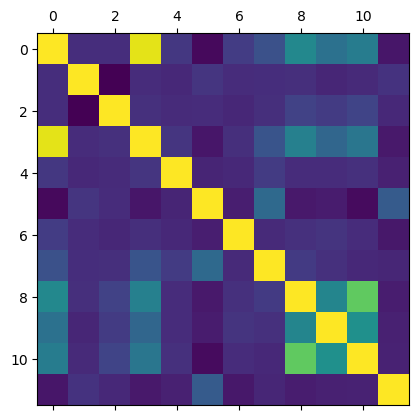

<Figure size 640x480 with 0 Axes>

In [143]:
# Create a correlation heatmap using matplotlib

plt.matshow(df_cal_list_dtl.corr())
plt.show()
plt.savefig("correaltion_first.png") #saving the figure

In [144]:
#current dir
cwd = os.getcwd()
cwd

'/Users/keerthiputti/Desktop/Achievment 6/Airbnb Amsterdam/03 Scripts'

## 2 
Use the questions you defined in the previous task to pick out variables from your data set suitable for your exploratory visual analysis.
For instance, discard “ID,” “date,” and “index” variables.

In [150]:
#create subset

df_sub=df_cal_list_dtl[['Price_cal','Price_list','Min_nights','N_reviews','Host_list_count','Availability_365','N.People','Bathrooms','Bedrooms','Rating_100']]
                        
                        
                        

Text(0.5, 1.0, 'Correlation Matrix')

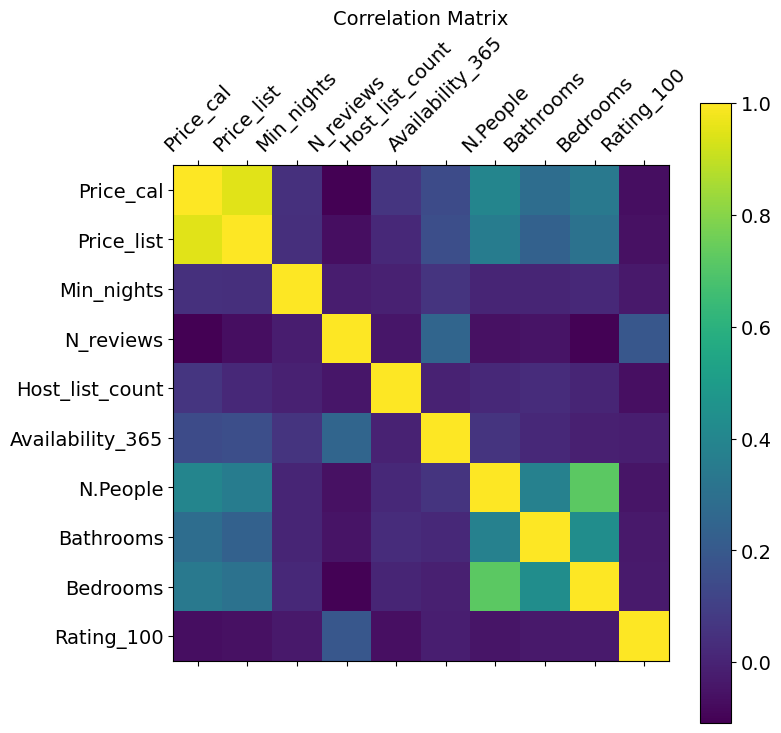

In [151]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_sub.shape[1]), df_sub.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_sub.shape[1]), df_sub.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

## 3
Create a correlation matrix heatmap (colored).
Discuss what the coefficients in the plot mean in terms of the relationships between the variables.

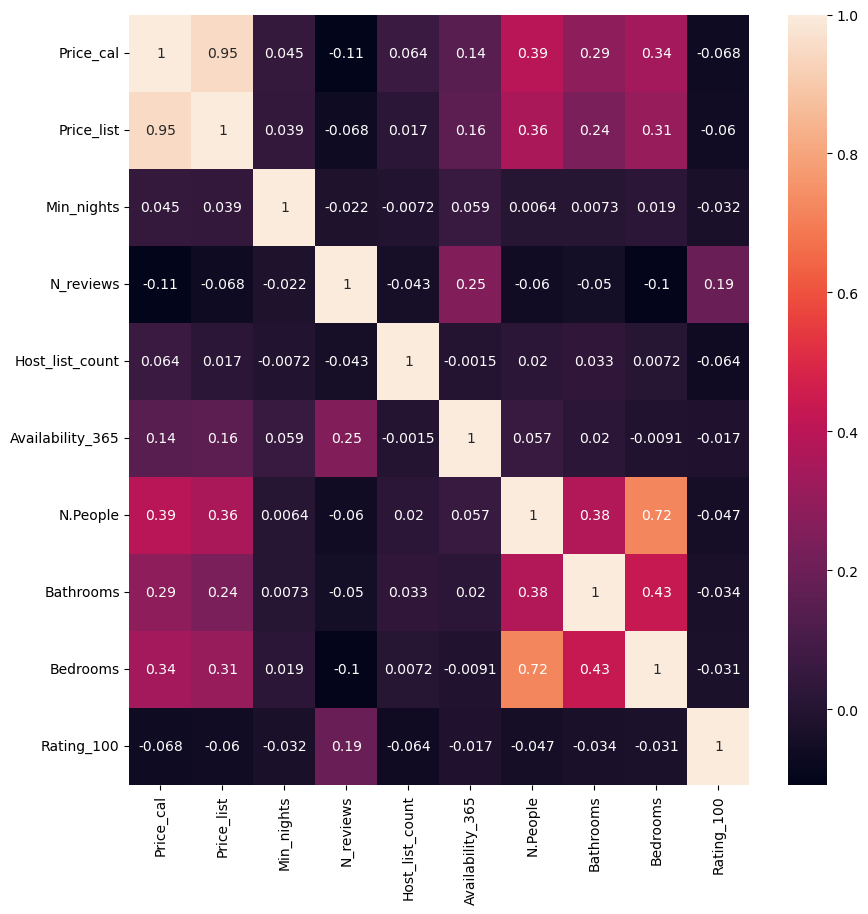

In [152]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr_viz = sns.heatmap(df_sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.


## understading gathered
1. There is a strong relation between number of people can stay and number of bedrooms.
2. The general price of listing and price of listing over the year(difference season) dont change much and they have a positive correalation.
3. There is weak relation between price listed to number of people/bedroom and bathroom in the property
4. There is strong relation between Number of people and bedrooms

## 4
Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships.
Discuss the output in a markdown cell.

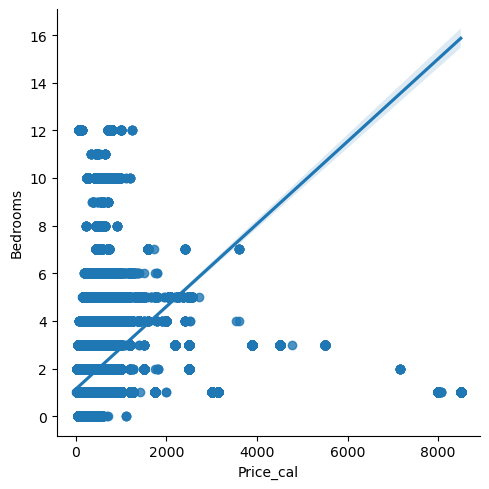

In [157]:
#creating scatter plot price and bedrooms

Price_bed_scat=sns.lmplot(x = 'Price_cal', y = 'Bedrooms', data = df_sub)

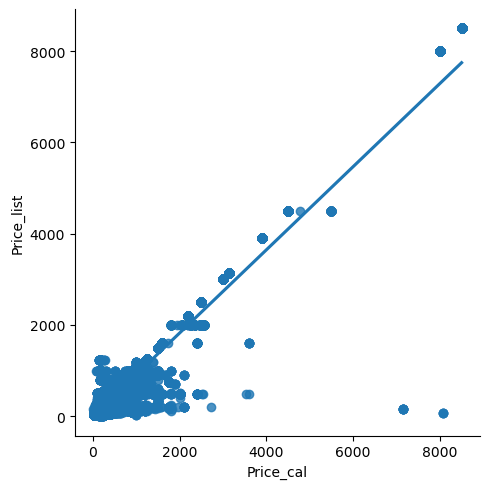

In [158]:
#creating scatter plot Number of people and bedrooms

cal_list_price_scat=sns.lmplot(x = 'Price_cal', y = 'Price_list', data = df_sub)

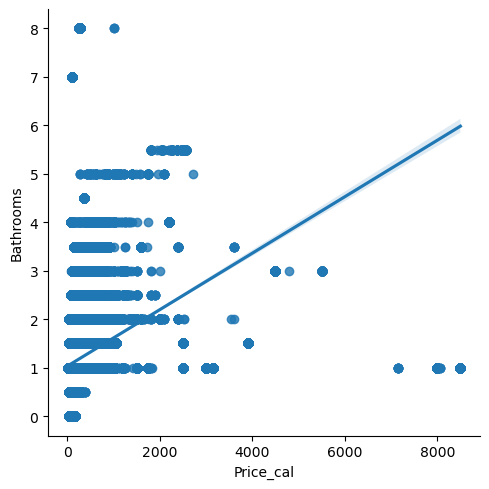

In [161]:
#creating scatter plot Price to bathrooms

Price_bad_scat=sns.lmplot(x = 'Price_cal', y = 'Bathrooms', data = df_sub)

## 5
Create a pair plot of the entire data set.
Comment on the distribution of the variables and mark variables you’d like to explore further with an explanation of why.

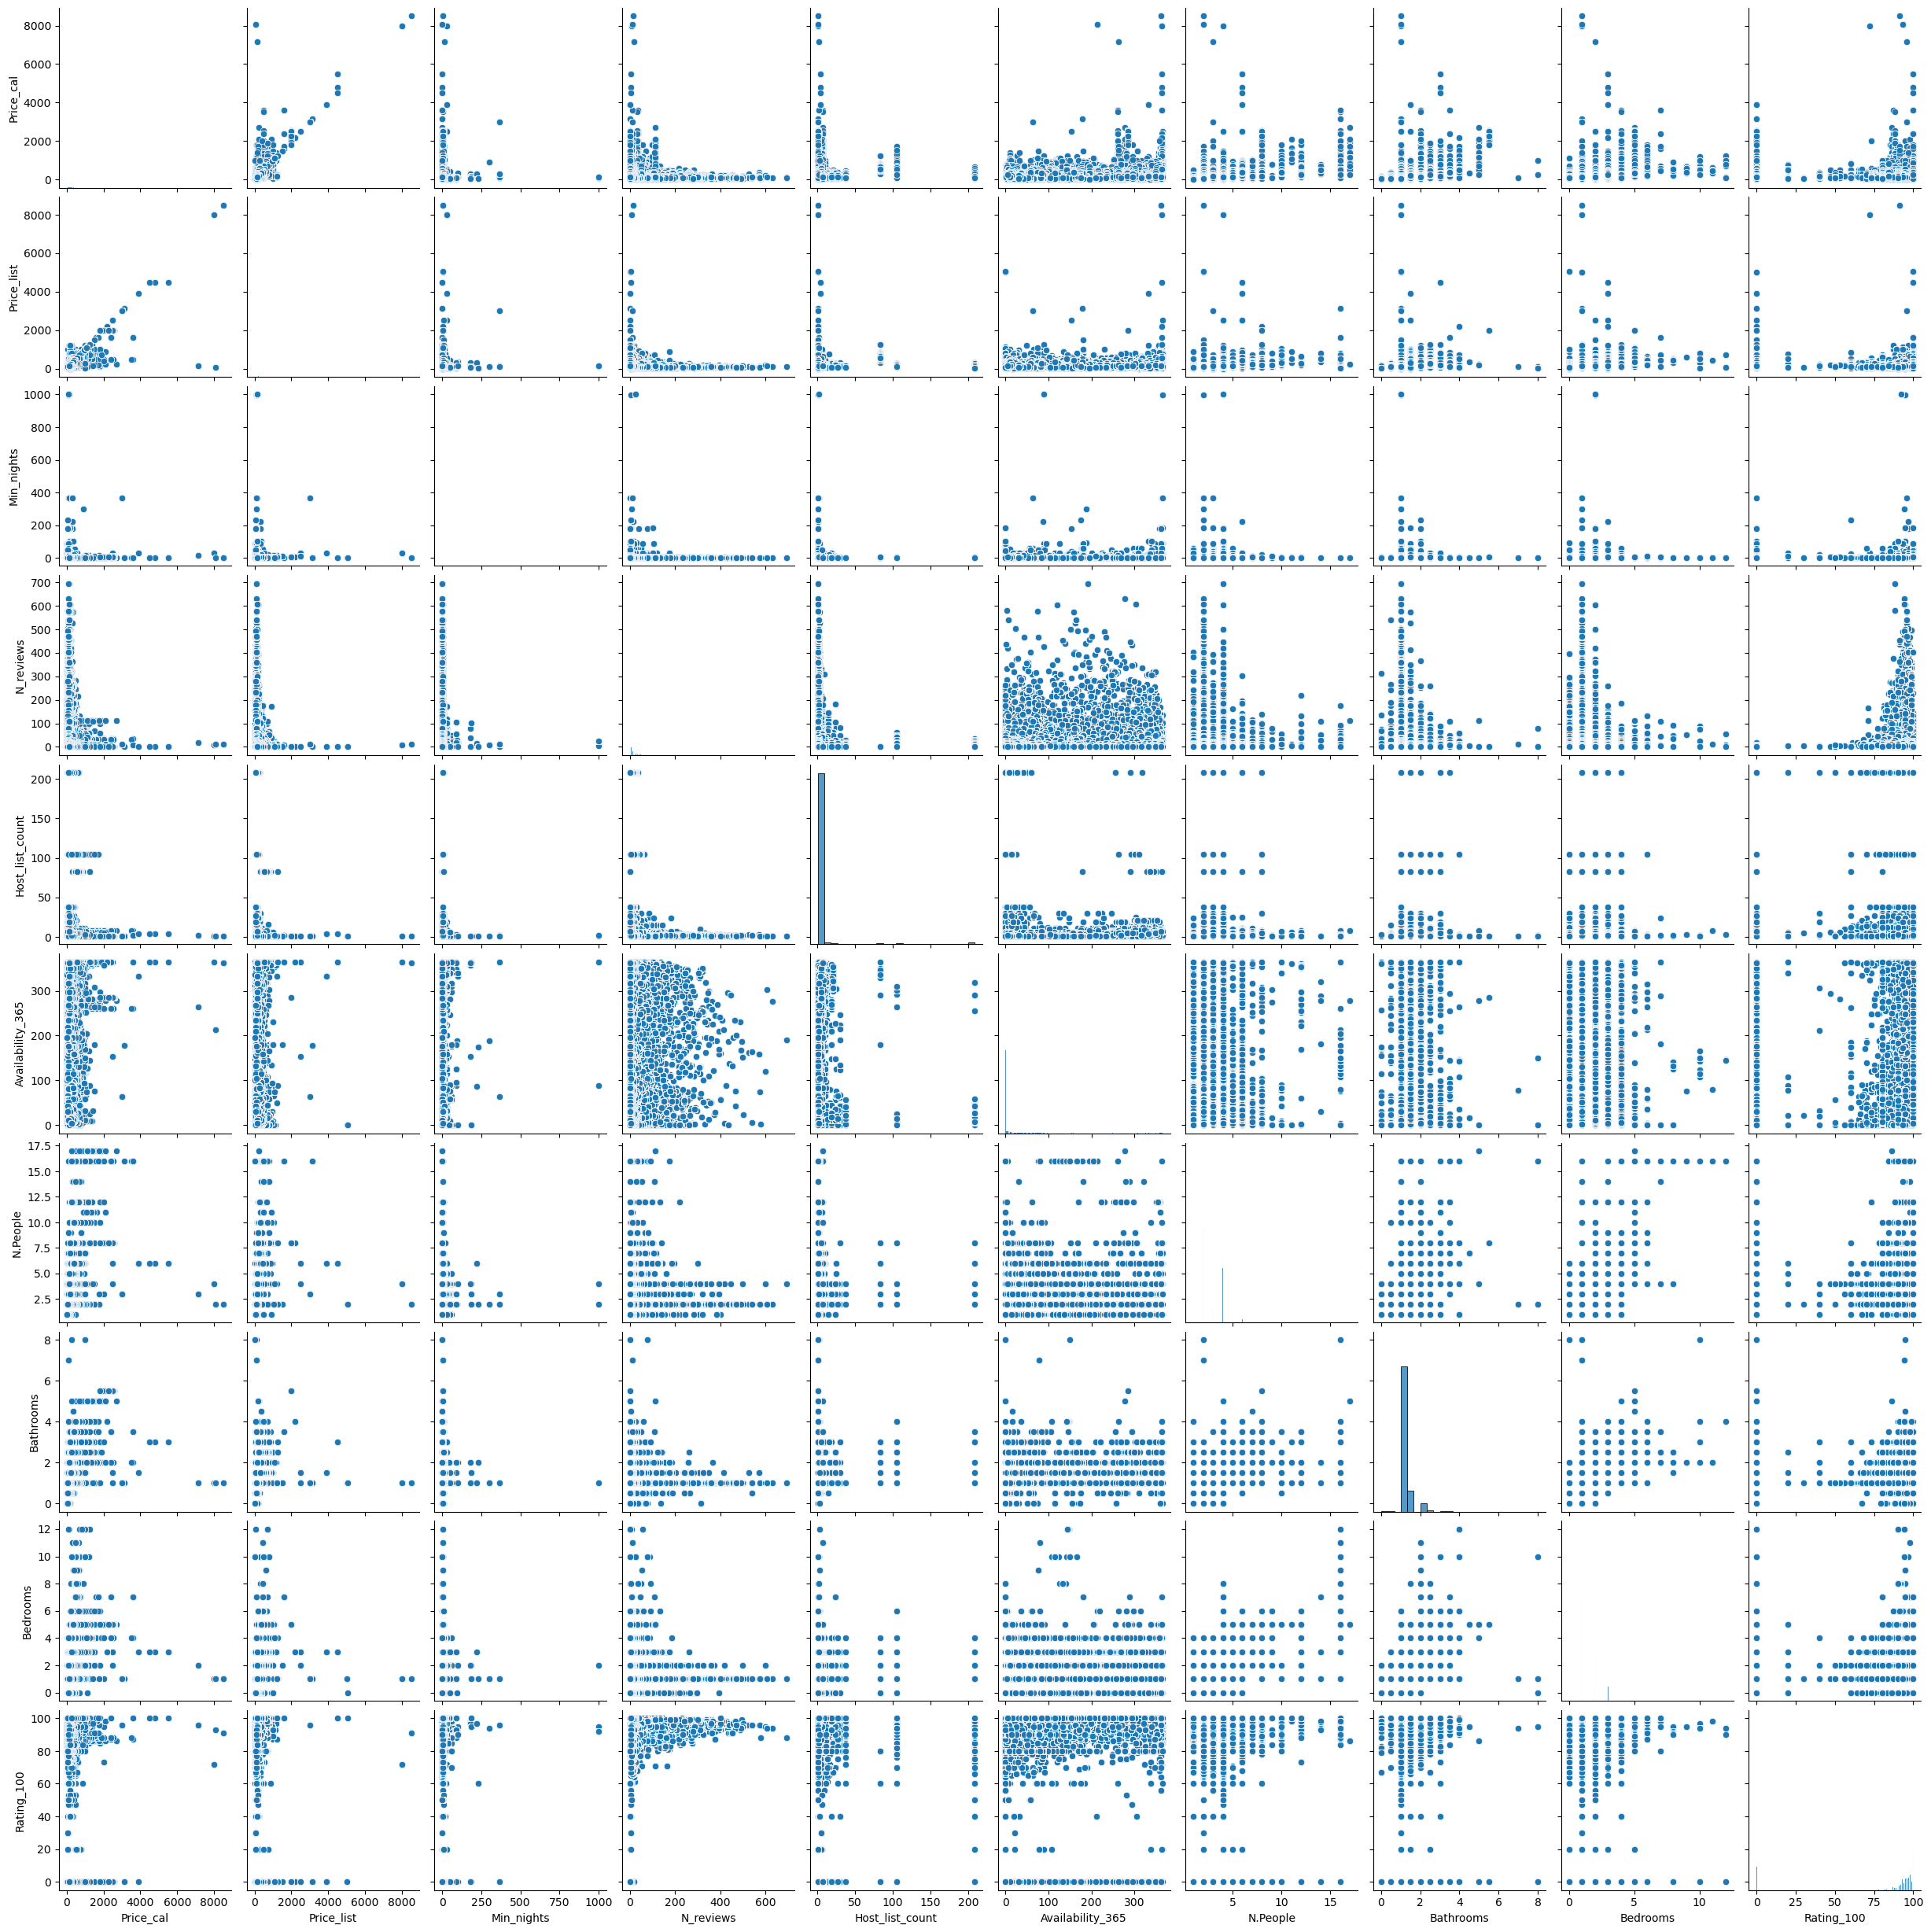

In [154]:
# Create a pair plot 

pair_plot_df_sub = sns.pairplot(df_sub)

## 6
Create a categorical plot and interpret the results.

In [160]:
df_cal_list_dtl['Room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

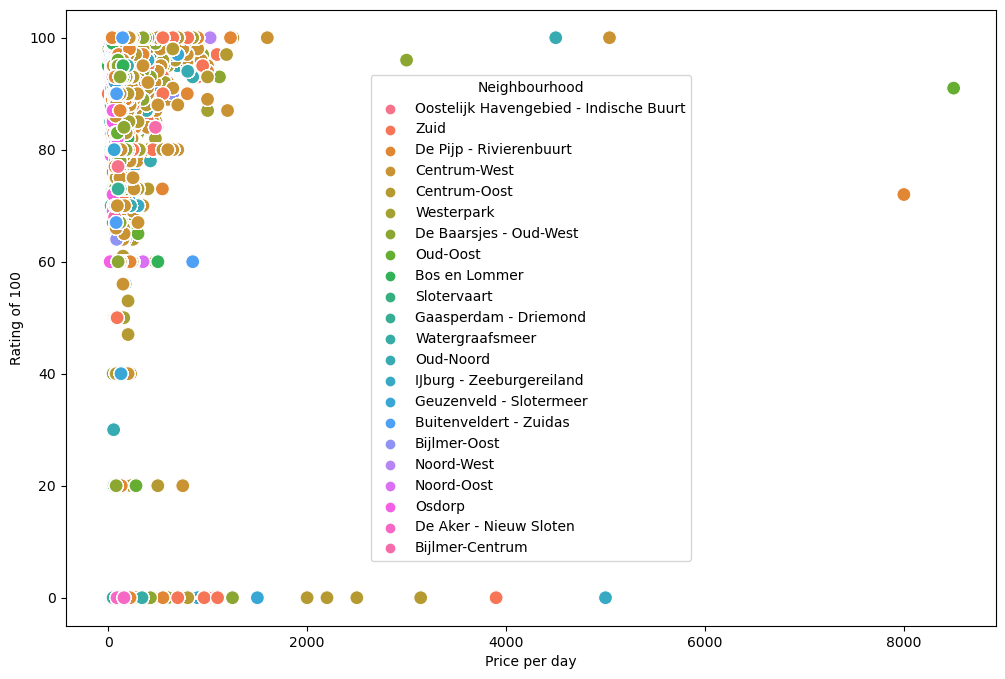

In [75]:
# Plot the clusters for the "House Age" and "Price per Unit" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cal_list_dtl['Price_list'], y=df_cal_list_dtl['Rating_100'], hue=df_cal_list_dtl['Neighbourhood'], s=100)

ax.grid(False) 
plt.xlabel('Price per day') 
plt.ylabel('Rating of 100') 
plt.show()

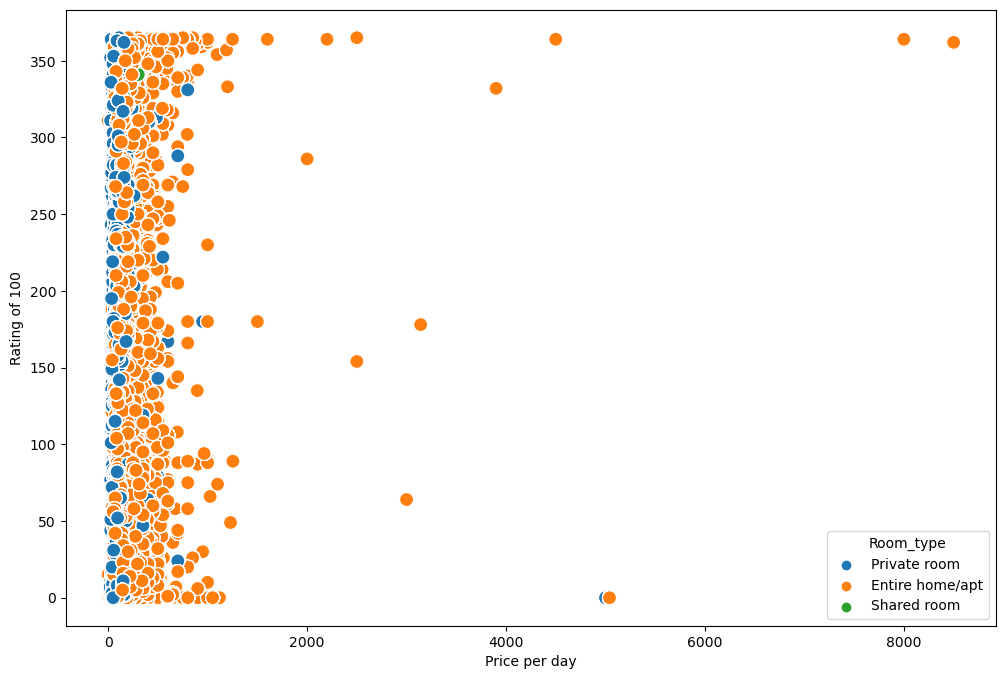

In [76]:
# Plot the clusters for the "House Age" and "Price per Unit" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cal_list_dtl['Price_list'], y=df_cal_list_dtl['Availability_365'], hue=df_cal_list_dtl['Room_type'], s=100)

ax.grid(False) 
plt.xlabel('Price per day') 
plt.ylabel('Availability') 
plt.show()

#different neighbourhood price vs rating

/* sns.set(style="ticks")
categorical_viz_loc = sns.catplot(x="Price_list", y="Rating_100", hue="neighbourhood", data=df_cal_list_dtl, height=4,aspect=2)*/

#different Pirce vs availability of diffferent types of rooms

sns.set(style="ticks")
categorical_viz_room = sns.catplot(x="Price_list", y="Availability_365", hue="Room_type", data=df_cal_list_dtl, height=4,aspect=2)

In [352]:
## Exporting the final data 
df_cal_list_dtl.to_csv(os.path.join(path,'Prepared Data','Listing_calendar_data_details.csv'),index=False)

## End of task 6.2 and begining of 6.3

In [165]:
#importing geojson file

country_geo=r'/Users/keerthiputti/Desktop/Achievment 6/Airbnb Amsterdam/02 Data/neighbourhoods.geojson'

In [188]:
df_cal_list_dtl.rename(columns={'Neighbourhood':'neighbourhood'},inplace=True)

/var/folders/2f/9v7c1_v50z5919rws2_ds4rm0000gn/T/ipykernel_8327/2420110088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cal_list_dtl.rename(columns={'Neighbourhood':'neighbourhood'},inplace=True)


In [189]:
df_cal_list_dtl.head()

,Listing_id,Date,Availability,Price_cal,Place_name,Host_id,neighbourhood,latitude,longitude,Room_type,Price_list,Min_nights,N_reviews,Host_list_count,Availability_365,N.People,Bathrooms,Bedrooms,Rating_100,_merge
0,2818,2019-12-05,f,61.954545,Quiet Garden View Room & Super Fast WiFi,3159,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,59,3,248,1,44,2,1.5,1.0,97.0,both
1,2818,2019-12-04,f,61.954545,Quiet Garden View Room & Super Fast WiFi,3159,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,59,3,248,1,44,2,1.5,1.0,97.0,both
2,2818,2019-12-03,f,61.954545,Quiet Garden View Room & Super Fast WiFi,3159,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,59,3,248,1,44,2,1.5,1.0,97.0,both
3,2818,2019-12-02,f,61.954545,Quiet Garden View Room & Super Fast WiFi,3159,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,59,3,248,1,44,2,1.5,1.0,97.0,both
4,2818,2019-12-01,f,61.954545,Quiet Garden View Room & Super Fast WiFi,3159,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Private room,59,3,248,1,44,2,1.5,1.0,97.0,both


In [169]:
# That's just in case you want to look at the JSON file contents here too:

f = open(r"/Users/keerthiputti/Desktop/Achievment 6/Airbnb Amsterdam/02 Data/neighbourhoods.geojson",)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data["features"]:
    print(i)

{'type': 'Feature', 'geometry': {'type': 'MultiPolygon', 'coordinates': [[[[4.991669, 52.324436, 43.069286], [4.991756, 52.324289, 43.069544], [4.991828, 52.324175, 43.069746], [4.991894, 52.324077, 43.069917], [4.991952, 52.323996, 43.070058], [4.992036, 52.32387, 43.07028], [4.992109, 52.323767, 43.070461], [4.99217, 52.323706, 43.070568], [4.992597, 52.323135, 43.071567], [4.993457, 52.32195, 43.073645], [4.994212, 52.321029, 43.075261], [4.99435, 52.320829, 43.075611], [4.994392, 52.320774, 43.075707], [4.994407, 52.32076, 43.075732], [4.994621, 52.320511, 43.076169], [4.994822, 52.320267, 43.076596], [4.994834, 52.320241, 43.076642], [4.994884, 52.320184, 43.076741], [4.995243, 52.319674, 43.077635], [4.99541, 52.319446, 43.078034], [4.995604, 52.31921, 43.078448], [4.995819, 52.318968, 43.078872], [4.996035, 52.318706, 43.079331], [4.99612, 52.318579, 43.079554], [4.996189, 52.318501, 43.079691], [4.996431, 52.318201, 43.080215], [4.996455, 52.318169, 43.080272], [4.996719, 52.31

<AxesSubplot:xlabel='Rating_100', ylabel='Count'>

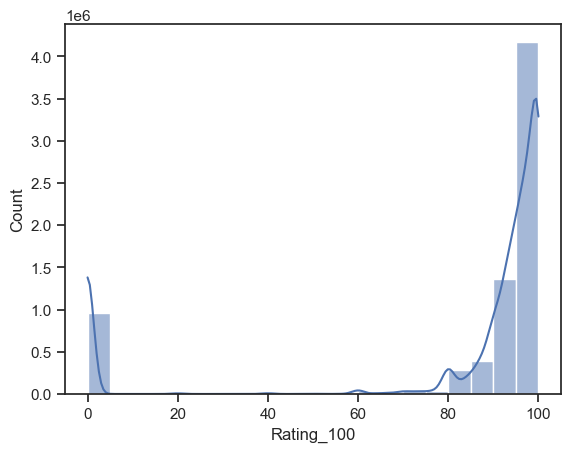

In [170]:
# Check the rating variable

sns.histplot(df_cal_list_dtl['Rating_100'], bins=20, kde = True)

In [190]:
df_cal_list_dtl['neighbourhood'].unique()

array(['Oostelijk Havengebied - Indische Buurt', 'Zuid',
       'De Pijp - Rivierenbuurt', 'Centrum-West', 'Centrum-Oost',
       'Westerpark', 'De Baarsjes - Oud-West', 'Oud-Oost',
       'Bos en Lommer', 'Slotervaart', 'Gaasperdam - Driemond',
       'Watergraafsmeer', 'Oud-Noord', 'IJburg - Zeeburgereiland',
       'Geuzenveld - Slotermeer', 'Buitenveldert - Zuidas',
       'Bijlmer-Oost', 'Noord-West', 'Noord-Oost', 'Osdorp',
       'De Aker - Nieuw Sloten', 'Bijlmer-Centrum'], dtype=object)

<AxesSubplot:xlabel='Price_list', ylabel='Count'>

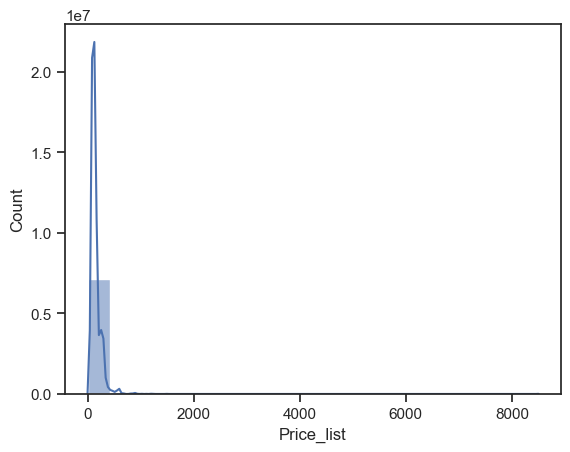

In [171]:
# Check the rating variable

sns.histplot(df_cal_list_dtl['Price_list'], bins=20, kde = True)

In [293]:
# Setup a folium map at a high-level zoom
map_price = folium.Map(location = [52.377956, 4.897070], zoom_start =12)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
c=folium.Choropleth(
    geo_data = country_geo, 
    data = df_cal_list_dtl,
    columns = ["neighbourhood", "Price_list"],
    key_on = "feature.properties.neighbourhood", # this part is very important - check your json file to see where the KEY is located
    fill_color = "RdPu", fill_opacity=0.8, line_opacity=0.3,nan_fill_color="White",labels=['neighbourhood'],
    legend_name = "Price").add_to(map_price),  
    
folium.LayerControl().add_to(map_price)


map_price

In [295]:
# Setup a folium map at a high-level zoom
map_rating = folium.Map(location = [52.377956, 4.897070], zoom_start =12)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = df_cal_list_dtl,
    columns = ["neighbourhood", "Rating_100"],
    key_on = "feature.properties.neighbourhood", # this part is very important - check your json file to see where the KEY is located
    fill_color = "RdPu", fill_opacity=0.8, line_opacity=0.1,nan_fill_color="White",
    legend_name = "Rating").add_to(map_rating)
folium.LayerControl().add_to(map_rating)

map_rating

## End of 6.3 and Begining of 6.4

## From previous task, we understood below relationships between the variables
 For the regression analysis, I am considering price and number of people.

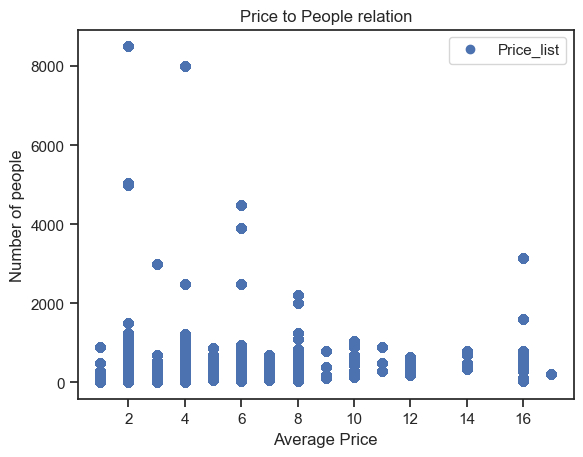

In [334]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_cal_list_dtl.plot(x = 'N.People', y='Price_list',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Price to People relation')  
plt.xlabel('Average Price')  
plt.ylabel('Number of people')  
plt.show()

In [324]:
df_sub=df_cal_list_dtl[df_cal_list_dtl['Price_list'] < 50000.0]

In [325]:
df_sub.shape

(7289415, 20)

In [326]:
df_sub.corr()

,Price_cal,latitude,longitude,Price_list,Min_nights,N_reviews,Host_list_count,Availability_365,N.People,Bathrooms,Bedrooms,Rating_100
Price_cal,1.000000,0.010293,0.011068,0.951111,0.044717,-0.108705,0.064412,0.143966,0.394151,0.287052,0.339121,-0.067956
latitude,0.010293,1.000000,-0.138166,0.006061,-0.007927,0.039020,0.006791,0.011019,0.015602,-0.013686,-0.000608,0.027515
longitude,0.011068,-0.138166,1.000000,0.018004,0.001052,0.005525,-0.012183,0.015415,0.085700,0.061505,0.093405,-0.007685
Price_list,0.951111,0.006061,0.018004,1.000000,0.038754,-0.068243,0.017373,0.159142,0.356934,0.236968,0.309617,-0.059536
Min_nights,0.044717,-0.007927,0.001052,0.038754,1.000000,-0.021919,-0.007201,0.058869,0.006364,0.007296,0.019050,-0.032358
N_reviews,-0.108705,0.039020,0.005525,-0.068243,-0.021919,1.000000,-0.042673,0.252786,-0.060041,-0.049933,-0.103884,0.190453
Host_list_count,0.064412,0.006791,-0.012183,0.017373,-0.007201,-0.042673,1.000000,-0.001501,0.019938,0.032684,0.007233,-0.064110
Availability_365,0.143966,0.011019,0.015415,0.159142,0.058869,0.252786,-0.001501,1.000000,0.056631,0.019912,-0.009137,-0.016586
N.People,0.394151,0.015602,0.085700,0.356934,0.006364,-0.060041,0.019938,0.056631,1.000000,0.379494,0.722608,-0.046562
Bathrooms,0.287052,-0.013686,0.061505,0.236968,0.007296,-0.049933,0.032684,0.019912,0.379494,1.000000,0.432770,-0.033706


In [335]:
#reshaoing using Numpyarray for regression analysis

X=df_sub['N.People'].values.reshape(-1,1)
y=df_sub['Price_list'].values.reshape(-1,1)

In [336]:
X

array([[2],
       [2],
       [2],
       ...,
       [4],
       [4],
       [4]])

In [337]:
y

array([[ 59],
       [ 59],
       [ 59],
       ...,
       [159],
       [159],
       [159]])

In [338]:
#splitting data for test and train

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3 , random_state=0)

## Regression Analysis

In [339]:
#create an object for linear regression

regression=LinearRegression()

In [340]:
#fit the regression object on train data set

regression.fit(X_train, y_train)

LinearRegression()

In [341]:
#predict y values using X
y_predicted= regression.predict(X_test)

In [342]:
y_predicted

array([[116.9810799],
       [116.9810799],
       [195.9768276],
       ...,
       [116.9810799],
       [195.9768276],
       [116.9810799]])

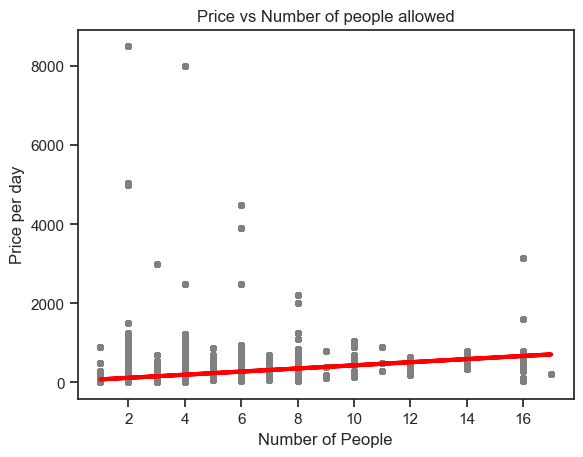

In [343]:
#plot predicted values in scatterpolt

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Price vs Number of people allowed')
plot_test.xlabel('Number of People')
plot_test.ylabel('Price per day')
plot_test.show()

In [344]:
#create objects that contain summary of predicted values

rmse = mean_squared_error(y_test,y_predicted)
r2=r2_score(y_test , y_predicted)

In [345]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[39.49787385]]
Mean squared error:  17925.658041153514
R2 score:  0.13083221669760525


In [346]:
# Create a dataframe comparing the actual and predicted values of y.

data=pd.DataFrame({'Actual' : y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head()

,Actual,Predicted
0,99,116.981080
1,60,116.981080
2,250,195.976828
3,75,116.981080
4,150,195.976828


In [348]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [349]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [350]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[39.49787385]]
Mean squared error:  18824.19768742466
R2 score:  0.12599330831430988


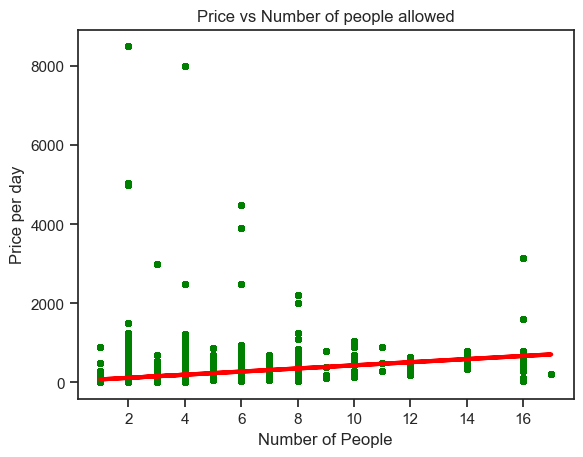

In [351]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Price vs Number of people allowed')
plot_test.xlabel('Number of People')
plot_test.ylabel('Price per day')
plot_test.show()

From the R2(too low) and mean squared error(too high), we can understand that there is no linear relation between Number of people that can stay in the Airbnb to price. This model is not suitable for the data set we have here.